In [1]:
import os     #使用操作系統相關功能的模塊
import numpy as np          #Python進行科學計算的基礎包
import pandas as pd
from keras.utils import np_utils
import warnings
import facerecognition as fr

warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
fr.version()

platform          : win32
conda             : 4.5.5
jupyter notebook  : 5.0.0
Python            : 3.6.3 
numpy             : 1.13.3
pandas            : 0.20.3
matplotlib        : 2.2.2
sklearn           : 0.19.1
tensorflow        : 1.2.1
keras             : 2.1.3
cv2               : 3.4.0
dlib              : 19.6.1


In [3]:
fr.extract_face(sample='sample0_face', number=100)

已擷取100張人臉圖片
已擷取100張人臉樣本


In [4]:
fr.extract_face(sample='sample1_face', number=100)

已擷取100張人臉圖片
已擷取100張人臉樣本


In [5]:
fr.extract_face(sample='sample2_face', number=100)

已擷取100張人臉圖片
已擷取100張人臉樣本


In [6]:
# 寫入sample_name.txt

In [7]:
name_dict, number_of_samples=fr.get_name_dict()

In [8]:
fr.train_validation_test_split(tt_split_ratio=0.2, tv_split_ratio=0.2)

--------------------------------------------------------------------------------
|                                                              |               |
|              sample_train_validation                         |  sample_test  |
|                                                              |               |
--------------------------------------------------------------------------------
sample0_train_validation: 80 					sample0_test: 20
sample1_train_validation: 80 					sample1_test: 20
sample2_train_validation: 80 					sample2_test: 20

--------------------------------------------------------------------------------
|                                      |                       |               |
|              sample_train            |  sample_validation    |  sample_test  |
|                                      |                       |               |
--------------------------------------------------------------------------------
sample0_train: 64 			sample0_validat

# 資料增強

In [9]:
fr.data_augmentation(numbers=2)

sample0_face共增加了128筆資料
sample1_face共增加了128筆資料
sample2_face共增加了128筆資料


In [10]:
# 複製到sample0_face後刪除sample0_face+

# 資料預處理

In [11]:
target_size = 64

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255) 
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train/', target_size = (target_size, target_size), batch_size = 10, class_mode = 'categorical')
validation_set = validation_datagen.flow_from_directory('validation/', target_size = (target_size, target_size), batch_size = 10, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('test/', target_size = (target_size, target_size), batch_size = 10, class_mode = 'categorical')

Found 384 images belonging to 3 classes.
Found 48 images belonging to 3 classes.
Found 59 images belonging to 3 classes.


# 建立模型

In [14]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

model = Sequential() # Initialising the CNN
model.add(Conv2D(32, (3, 3), input_shape = (target_size, target_size, 3), activation = 'relu')) # Convolution
model.add(MaxPooling2D(pool_size = (2, 2))) # Max Pooling
model.add(Conv2D(32, (3, 3), activation = 'relu')) # Convolution
model.add(MaxPooling2D(pool_size = (2, 2))) # Max Pooling
model.add(Flatten()) # Flattening
model.add(Dense(units = 128, activation = 'relu')) # Fully Connected
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = number_of_samples, activation = 'softmax'))
model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
__________

# 訓練模型

In [15]:
from keras.models import load_model

try:
    model = load_model('SaveModel/facerecognition.hd5')
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


In [16]:
# https://keras-cn.readthedocs.io/en/latest/models/model/

In [17]:
history = model.fit_generator(training_set,
                              nb_epoch=20,
                              nb_val_samples=30,
                              steps_per_epoch = 30,
                              shuffle=True,
                              verbose = 1,
                              validation_data = validation_set)

Epoch 1/20
30/30 [==============================] - 3s 85ms/step - loss: 1.1099 - acc: 0.3133 - val_loss: 1.0940 - val_acc: 0.5833
Epoch 2/20
30/30 [==============================] - 2s 64ms/step - loss: 1.0963 - acc: 0.3650 - val_loss: 1.0854 - val_acc: 0.3333
Epoch 3/20
30/30 [==============================] - 2s 69ms/step - loss: 1.0743 - acc: 0.4167 - val_loss: 1.0982 - val_acc: 0.3333
Epoch 4/20
30/30 [==============================] - 2s 61ms/step - loss: 1.0740 - acc: 0.4199 - val_loss: 0.9709 - val_acc: 0.5625
Epoch 5/20
30/30 [==============================] - 2s 65ms/step - loss: 0.9782 - acc: 0.5115 - val_loss: 0.9482 - val_acc: 0.3542
Epoch 6/20
30/30 [==============================] - 2s 66ms/step - loss: 1.0140 - acc: 0.5070 - val_loss: 0.9829 - val_acc: 0.5208
Epoch 7/20
30/30 [==============================] - 2s 69ms/step - loss: 0.8077 - acc: 0.6464 - val_loss: 0.5656 - val_acc: 0.6667
Epoch 8/20
30/30 [==============================] - 2s 68ms/step - loss: 0.7395 - a

# 驗證曲線

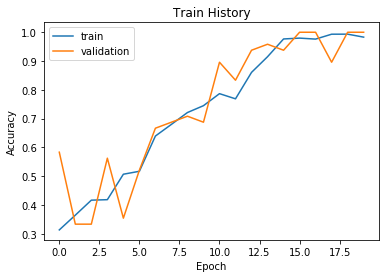

In [18]:
fr.show_acc_history(history=history)

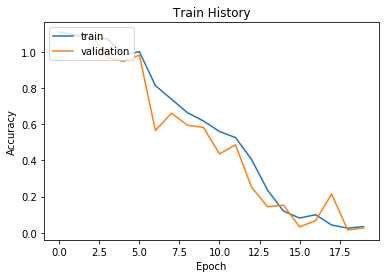

In [19]:
fr.show_loss_history(history=history)

# 評估模型

In [20]:
fr.evaluation_model(model=model)

Found 59 images belonging to 3 classes.


0.96610168784351669

# 混淆矩陣

In [21]:
fr.crosstab(model=model)

Found 59 images belonging to 3 classes.


predict,angry,normal,smile
label,,,
angry,18,2,0
normal,0,20,0
smile,0,0,19


# 儲存模型

In [22]:
if not os.path.exists('SaveModel'):
    os.mkdir('SaveModel')
# classifier.save_weights("SaveModel/face.h5")
model.save('SaveModel/facerecognition.hd5')
print("Saved model to disk")

Saved model to disk


# 模型預測

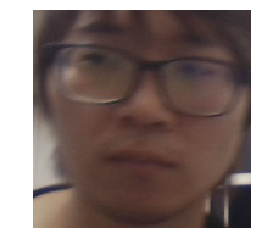

normal      的機率為: 0.8629427552223206
smile       的機率為: 0.020615868270397186
angry       的機率為: 0.11644137650728226

預測結果為: normal(0.8629427552223206%)


In [23]:
fr.predict(model=model, img=r'sample0_face\sample0_0.jpg')

# 人臉辨識

In [24]:
fr.face_recognition(model=model, threshold=0.5)